# Predcit Melbourne housing prices.

1. Run prediction with numerical columns

In [1]:
from arcgis import GIS

In [2]:
gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")

In [3]:
housing_data = gis.content.search('title: Melbourne Housing Market', 'Feature layer', outside_org=True)[0]

<Item title:"Melbourne Housing Market" type:Feature Layer Collection owner:demo_deldev>
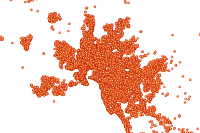

In [4]:
housing_data

In [5]:
from arcgis.features import SpatialDataFrame

In [6]:
sdf = SpatialDataFrame.from_layer(housing_data.layers[0])

In [7]:
sdf.columns

Index(['Address', 'Bathroom', 'Bedroom2', 'BuildingArea', 'Car', 'CouncilArea',
       'Date', 'Distance', 'FID', 'Landsize', 'Lattitude', 'Longtitude',
       'Method', 'Postcode', 'Price', 'Propertycount', 'Regionname', 'Rooms',
       'SellerG', 'Suburb', 'Type', 'YearBuilt', 'SHAPE'],
      dtype='object')

In [8]:
sdf.shape

(26881, 23)

In [9]:
sdf = sdf[sdf.Price.notnull()]

In [10]:
sdf.shape

(20993, 23)

In [11]:
sdf.columns

Index(['Address', 'Bathroom', 'Bedroom2', 'BuildingArea', 'Car', 'CouncilArea',
       'Date', 'Distance', 'FID', 'Landsize', 'Lattitude', 'Longtitude',
       'Method', 'Postcode', 'Price', 'Propertycount', 'Regionname', 'Rooms',
       'SellerG', 'Suburb', 'Type', 'YearBuilt', 'SHAPE'],
      dtype='object')

In [12]:
sdf.describe()

,Bathroom,Bedroom2,Car,Distance,FID,Landsize,Lattitude,Longtitude,Postcode,Price,Propertycount,Rooms,YearBuilt
count,20778.000000,20784.000000,20401.000000,20993.000000,20993.000000,17960.000000,20993.000000,20993.000000,20993.000000,2.099300e+04,20993.000000,20993.000000,12076.000000
mean,1.591298,3.046237,1.715259,11.359020,13443.965941,593.748719,-37.806963,144.996711,3114.630972,1.089746e+06,7516.751489,3.059163,1966.592001
std,0.700844,0.954948,0.994518,6.891418,7730.711620,3759.538783,0.091619,0.120680,114.810599,6.530283e+05,4411.397778,0.949881,36.752058
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-38.190430,144.423790,3000.000000,8.500000e+04,83.000000,1.000000,1196.000000
25%,1.000000,2.000000,1.000000,6.400000,6777.000000,219.000000,-37.860900,144.925300,3046.000000,6.570000e+05,4380.000000,2.000000,1950.000000
50%,1.000000,3.000000,2.000000,10.400000,13481.000000,512.000000,-37.800460,145.003200,3087.000000,9.100000e+05,6567.000000,3.000000,1970.000000
75%,2.000000,4.000000,2.000000,14.200000,20082.000000,664.000000,-37.748970,145.068770,3152.000000,1.335000e+06,10331.000000,4.000000,2000.000000
max,9.000000,20.000000,18.000000,48.100000,26881.000000,433014.000000,-37.397800,145.526350,3978.000000,1.120000e+07,21650.000000,16.000000,2019.000000


# Dataset with continuous values

In [13]:
cols = ['Bathroom', 'Bedroom2', 'BuildingArea', 'Distance', 'Landsize',
        'Lattitude', 'Longtitude', 'Rooms', 'YearBuilt', 'Price']

In [14]:
df = sdf[cols]

In [15]:
df.head()

,Bathroom,Bedroom2,BuildingArea,Distance,Landsize,Lattitude,Longtitude,Rooms,YearBuilt,Price
1,1.0,2.0,None,2.5,202.0,-37.7996,144.9984,2,NaN,1480000.0
2,1.0,2.0,79,2.5,156.0,-37.8079,144.9934,2,1900.0,1035000.0
4,2.0,3.0,150,2.5,134.0,-37.8093,144.9944,3,1900.0,1465000.0
5,2.0,3.0,None,2.5,94.0,-37.7969,144.9969,3,NaN,850000.0
6,1.0,3.0,142,2.5,120.0,-37.8072,144.9941,4,2014.0,1600000.0


# Deleting rows with nan price 

In [16]:
import numpy as np

In [17]:
sf = df[np.isfinite(df['Price'])]

In [18]:
sf.shape

(20993, 10)

# Dropping the target value

In [19]:
y = sf.Price

In [20]:
sf.drop('Price', inplace=True, axis=1)

# Replacing nan values with the missing values

In [21]:
import pandas as pd

In [22]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [23]:
imputer.fit(sf)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [24]:
sf.median().values

array([ 1.000000e+00,  3.000000e+00,  1.330000e+02,  1.040000e+01,
        5.120000e+02, -3.780046e+01,  1.450032e+02,  3.000000e+00,
        1.970000e+03])

In [25]:
transformed = imputer.transform(sf)

In [26]:
x = pd.DataFrame(transformed, columns=sf.columns,
                          index = list(sf.index.values))

In [27]:
x.head()

,Bathroom,Bedroom2,BuildingArea,Distance,Landsize,Lattitude,Longtitude,Rooms,YearBuilt
1,1.0,2.0,133.0,2.5,202.0,-37.7996,144.9984,2.0,1970.0
2,1.0,2.0,79.0,2.5,156.0,-37.8079,144.9934,2.0,1900.0
4,2.0,3.0,150.0,2.5,134.0,-37.8093,144.9944,3.0,1900.0
5,2.0,3.0,133.0,2.5,94.0,-37.7969,144.9969,3.0,1970.0
6,1.0,3.0,142.0,2.5,120.0,-37.8072,144.9941,4.0,2014.0


# Feature scaling

In [28]:
x_scaled = (x-x.min())/(x.max()-x.min())

# Splittng train and test 

In [29]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(x_scaled, y, random_state=0)

In [30]:
len(train_X)

15744

In [31]:
len(train_y)

15744

In [32]:
len(test_X)

5249

In [33]:
len(test_y)

5249

# Training and testing model

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model = DecisionTreeRegressor(max_leaf_nodes=500)
model.fit(train_X, train_y)
predicted = model.predict(test_X)
r2_score(test_y, predicted)

0.6814292905003134

In [35]:
# mean absolute error for decisiontreeclassifier
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, predicted)

217740.1282340278

In [36]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest = forest_reg.fit(train_X, train_y)
Predicted = forest.predict(test_X)
r2_score(test_y, Predicted)

0.7659181132222522

In [37]:
# mean absolute error for RandonForestRegressor
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, Predicted)

182061.09502127388

2. Run prediction with categorical columns by making dummies.

In [38]:
columns = ['Bathroom', 'Bedroom2', 'Distance', 'Landsize',
        'Lattitude', 'Longtitude', 'Rooms', 'Price', 'Regionname', 'Method']

In [39]:
dt = sdf[columns]

In [40]:
len(dt)

20993

In [41]:
dt.isnull().sum()

Bathroom       215
Bedroom2       209
Distance         0
Landsize      3033
Lattitude        0
Longtitude       0
Rooms            0
Price            0
Regionname       0
Method           0
dtype: int64

In [42]:
dd = dt[np.isfinite(dt['Price'])]

In [43]:
dd.shape

(20993, 10)

In [44]:
corr_matrix = dd.corr()

corr_matrix['Price'].sort_values()

Distance     -0.235394
Lattitude    -0.215607
Landsize      0.032734
Longtitude    0.197874
Bathroom      0.430088
Bedroom2      0.430289
Rooms         0.446781
Price         1.000000
Name: Price, dtype: float64

# dropping target value

In [45]:
Y = dd.Price

In [46]:
dd.drop('Price', inplace=True, axis=1)

# Replacing nan values with median

In [47]:
dd_num = dd.drop(['Method','Regionname'], axis=1)

In [48]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [49]:
imputer.fit(dd_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [50]:
transformed = imputer.transform(dd_num)

In [51]:
X_transfomed = pd.DataFrame(transformed, columns=dd_num.columns,
                          index = list(dd_num.index.values))

In [52]:
X = pd.concat([X_transfomed, dd[['Method','Regionname']]], axis=1)

In [53]:
X.isnull().sum()

Bathroom      0
Bedroom2      0
Distance      0
Landsize      0
Lattitude     0
Longtitude    0
Rooms         0
Method        0
Regionname    0
dtype: int64

# Dummies

In [54]:
X_dummy = pd.get_dummies(X)

# scaling

In [55]:
X_scaled = (X_dummy-X_dummy.min())/(X_dummy.max()-X_dummy.min())

# Splitting train and test

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

# training and testing

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model = DecisionTreeRegressor(max_leaf_nodes=500)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
r2_score(y_test, predicted)

0.6458052436684913

In [58]:
# mean_absolute_error for DecissiontreeRegressor
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, Predicted)

618940.6649457039

In [59]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest = forest_reg.fit(x_train, y_train)
Predicted = forest.predict(x_test)
r2_score(y_test, Predicted)

0.7431406088585124

In [60]:
# mean_absolute_error for RandomForestRegressor
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, Predicted)

189131.15439675582

### 3. Visualization on orignal data

In [56]:
sdf.head(1)

,Address,Bathroom,Bedroom2,BuildingArea,Car,CouncilArea,Date,Distance,FID,Landsize,...,Postcode,Price,Propertycount,Regionname,Rooms,SellerG,Suburb,Type,YearBuilt,SHAPE
1,85 Turner St,1.0,2.0,None,1.0,Yarra City Council,03-12-2016,2.5,2,202.0,...,3067,1480000.0,4019,Northern Metropolitan,2,Biggin,Abbotsford,h,NaN,"{'x': 16141148.053839399, 'y': -4551154.566602..."


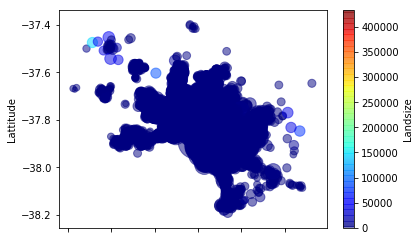

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
sdf.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.5, s=sdf["Price"]/10000,
         c="Landsize", cmap=plt.get_cmap("jet"))


In [59]:
import seaborn as sns

C:\Users\priyanka\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\priyanka\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


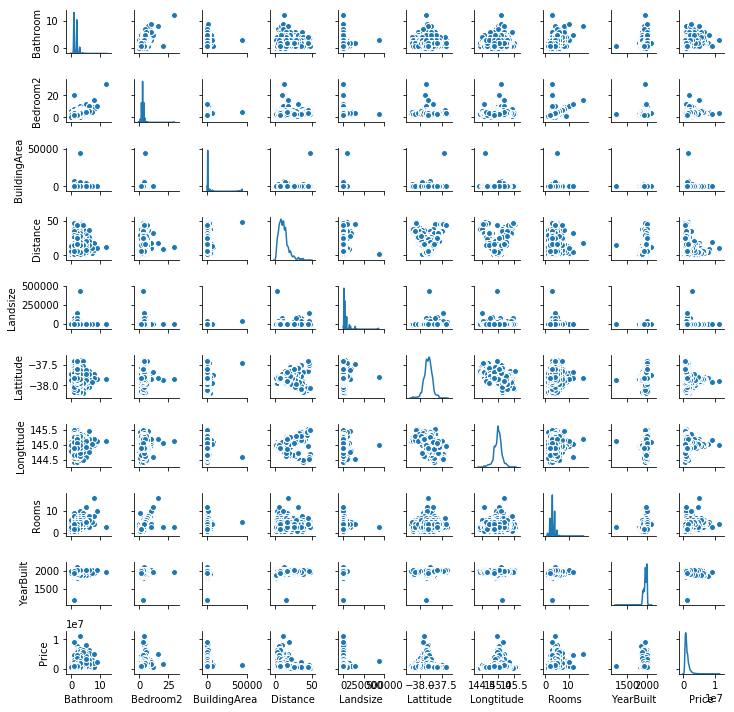

In [73]:
sns.pairplot(X, diag_kind="kde", size= 1)

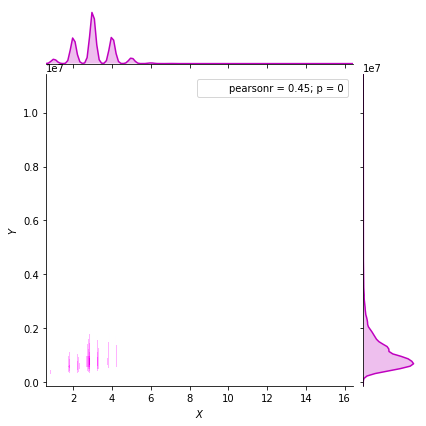

In [60]:
g = sns.jointplot(x=sdf.Rooms, y=sdf.Price, data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

In [57]:
sdf['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

[Text(0,0,'Northern Metropolitan'),
 Text(0,0,'Western Metropolitan'),
 Text(0,0,'Southern Metropolitan'),
 Text(0,0,'Eastern Metropolitan'),
 Text(0,0,'South-Eastern Metropolitan'),
 Text(0,0,'Eastern Victoria'),
 Text(0,0,'Northern Victoria'),
 Text(0,0,'Western Victoria')]

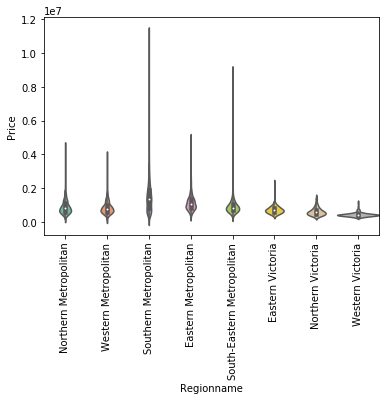

In [61]:
g = sns.violinplot(x=sdf.Regionname, y=df.Price, data=sdf, bw='silverman', width=1,  palette="Set2", size=8);


g.set_xticklabels(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'],rotation=90)

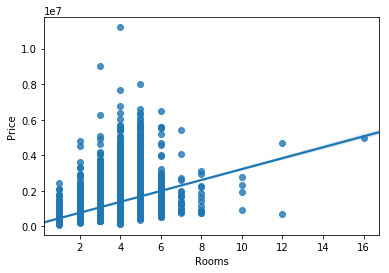

In [76]:
sns.regplot(x=df.Rooms, y=df.Price, data=sdf);

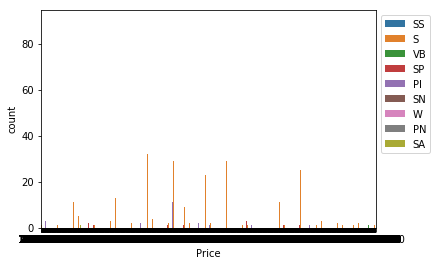

In [78]:
sns.countplot(x='Price', hue='Method', data=sdf)
plt.legend(bbox_to_anchor=(1,1))

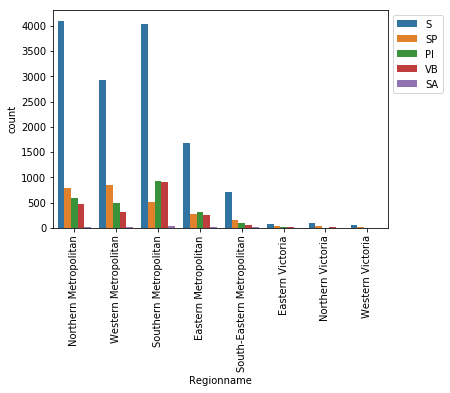

In [62]:


g = sns.countplot(x='Regionname', hue='Method', data=sdf)

g.set_xticklabels(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'],rotation=90)
plt.legend(bbox_to_anchor=(1,1))

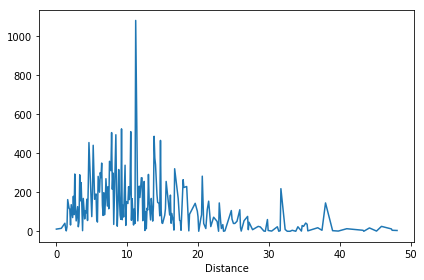

In [83]:
sdf.groupby(by='Distance').count()['Lattitude'].plot()
plt.tight_layout()